In [1]:
from common import *
disable_fig_save = False 
save_loc = 'plots'
save_prefix="pathfinding"
config_common(disable_fig_save=disable_fig_save, save_loc=save_loc, save_prefix=save_prefix)
from colors import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import warnings

%config InlineBackend.figure_format = 'svg'

from os import path
from typing import Dict, List, Set

import matplotlib.ticker as mtick
import matplotlib as mpl
from scipy.stats.mstats import gmean
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter, LogLocator)
import matplotlib.patches as patches
import matplotlib.patches as mpatches
from matplotlib import rc

import seaborn as sns

In [3]:
from common import *
init_notebook()
figsize = (7,1.65)
fontsize = 11

In [4]:
dataf = "../../data/msyncscaling.csv"
dataf_hugepage = "../../data/msyncscaling_hugepage.csv"
dataf_cxlbuf = "../../data/msyncscaling_cxlbuf.csv"
dataf_dj = "../../data/msyncscaling_dj.csv"

In [5]:
!sha256sum $dataf

62aec1ff522ba75d298d851aebf79831de18dc3b6a504be3a2bba91d5837a9e9  ../../data/msyncscaling.csv


In [6]:
!sha256sum $dataf_hugepage

fa8cb7e843e16ab568cfdb22605e444511c64a645c6b48a63f8a23df4c8d0bee  ../../data/msyncscaling_hugepage.csv


In [7]:
!sha256sum $dataf_cxlbuf

bbf2ab46dd5bd27adf4a45e2cdc146dd5ba000498548888111fc23f40c22523c  ../../data/msyncscaling_cxlbuf.csv


In [8]:
!sha256sum $dataf_dj

bcd7a9fb46f21482cab3c2f3bcde21beb501ad3590443f837eba404e84310fe8  ../../data/msyncscaling_dj.csv


In [9]:
df = pd.read_csv(dataf, index_col=None, names=['Threads', 'Time'])
df_hugepage = pd.read_csv(dataf_hugepage, index_col=None, names=['Threads', 'Time'])
df_cxlbuf = pd.read_csv(dataf_cxlbuf, index_col=None, names=['Threads', 'Time'])
df_dj = pd.read_csv(dataf_dj, index_col=None, names=['Threads', 'Time'])

In [10]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Time,7938418469,6029284174,4609614660,3838350476,3300336459,2933961191,2631069350,2416264711,2254438052,2110019870,1989084913,1898391081,1879511631,1782700172,1723488600,1658383119,1616262359,1566898592,1520363228


In [11]:
df_hugepage.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Time,8563484557,6052464182,4644946711,3830405206,3310243185,2927112302,2642884721,2425809985,2259603566,2107268060,1987391798,1898734639,1848737254,1767499161,1699817419,1644830329,1603989988,1551008265,1502897140


In [12]:
df_cxlbuf.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Time,2507030770,1267100554,927129699,831670034,762721034,738172337,752010438,743471859,775175090,784095577,788998262,788941404,798007291,799712729,802931321,806466141,812136334,819414377,814821686


In [13]:
df_dj.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Time,86211717264,2626476414204,1516829492702,2031985356295,1202417814121,963847787849,922100552634,860266610098,802442664298,767409213342,746599405242,724956526651,706272126472,689835977646,611156307300,800144081698,743283674563,841854437247,768850737920


In [14]:
df
df.index = df['Threads']
del df['Threads']

In [15]:
df_hugepage
df_hugepage.index = df_hugepage['Threads']
del df_hugepage['Threads']

In [16]:
df_cxlbuf
df_cxlbuf.index = df_cxlbuf['Threads']
del df_cxlbuf['Threads']

In [17]:
df_dj
df_dj.index = df_dj['Threads']
del df_dj['Threads']

In [18]:
df_norm = df/df['Time'][1]
df_hugepage_norm = df_hugepage/df_hugepage['Time'][1]
df_cxlbuf_norm = df_cxlbuf/df_cxlbuf['Time'][1]
df_dj_norm = df_dj/df_dj['Time'][1]

In [19]:
df_norm.T

Threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Time,1.0,0.759507,0.580672,0.483516,0.415742,0.36959,0.331435,0.304376,0.283991,0.265799,0.250564,0.23914,0.236761,0.224566,0.217107,0.208906,0.2036,0.197382,0.19152


In [20]:
df_hugepage_norm.T

Threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Time,1.0,0.706776,0.542413,0.447295,0.386553,0.341813,0.308623,0.283274,0.263865,0.246076,0.232077,0.221725,0.215886,0.2064,0.198496,0.192075,0.187306,0.181119,0.175501


In [21]:
df_cxlbuf_norm.T

Threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Time,1.0,0.505419,0.369812,0.331735,0.304233,0.294441,0.299961,0.296555,0.3092,0.312759,0.314714,0.314692,0.318308,0.318988,0.320272,0.321682,0.323944,0.326847,0.325015


In [22]:
df_dj_norm.T

Threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Time,1.0,30.465423,17.594238,23.569712,13.947267,11.180009,10.695768,9.978535,9.307814,8.901449,8.660069,8.409025,8.192299,8.00165,7.089017,9.281152,8.621609,9.764965,8.91817


In [23]:
df_plot = pd.DataFrame()
df_plot['Snapshot'] = df_cxlbuf['Time']
df_plot['msync (4 KiB)'] = df['Time']
df_plot['msync (2 MiB)'] = df_hugepage['Time']
# df_plot['msync data journal'] = df_dj['Time']

In [24]:
Fig.config(16, (8, 2))

Plot saved as `plots/pathfinding/msyncscaling.png`

Plot saved as `plots/pathfinding/msyncscaling.png`

Using pdfcrop on `plots/pathfinding/msyncscaling.png` with command `pdfcrop plots/pathfinding/msyncscaling.pdf plots/pathfinding/msyncscaling.pdf`

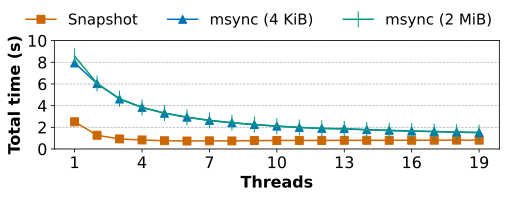

In [26]:
color=[CBcdict['Ve'], CBcdict['Bu'], CBcdict['bG'], CBcdict['rP']]
ax = (df_plot/10**9).plot(**Fig.get_kwargs(bar=False, color=color))
f = Fig(ax)
f.fmt_label('Threads', 'Total time (s)')
f.fmt_grid(axis='y', linestyle='--', linewidth=0.7)
marker=['s', '^', '|', 'o']
for i, line in enumerate(ax.get_lines()):
    line.set_marker(marker[i])
    if marker[i] == '|':
        line.set_markersize(16)
    else:
        line.set_markersize(8)
f.fmt_legend(fontsize=fontsize+4, y_off_scale=0.95, x_off_scale=0.92, frameon=False)
_ = ax.set_xticks(np.arange(1, 20.1, 3))
ax.set_ylim(0,10)
ax.set_yticks(np.arange(0, 10.1, 2))
save_fig('msyncscaling')